In [0]:
# check GPU is running
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14042202905056119241
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13620959326369885907
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8735727732381455300
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8797164340807537020
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *

In [0]:
bs = 64 # batch size
img_size = 224 # image size

In [0]:
path = Path("/content/gdrive/My Drive/model")
path.ls()

[PosixPath('/content/gdrive/My Drive/model/train'),
 PosixPath('/content/gdrive/My Drive/model/test'),
 PosixPath('/content/gdrive/My Drive/model/models')]

In [0]:
!ls "/content/gdrive/My Drive/model/train"

nonpneumothorax  pneumothorax


In [0]:
# create data bunch
# test dataset is an option; valid data == test data
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=img_size, bs=bs).normalize(imagenet_stats)

In [0]:
# ensure the classes are correct
print(data.classes)
len(data.classes),data.c

['nonpneumothorax', 'pneumothorax']


(2, 2)

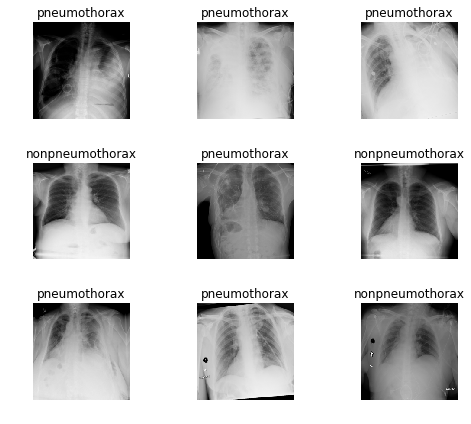

In [0]:
# visualize data
data.show_batch(rows=3, figsize=(7,6))

In [0]:
# train model: resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.505024,0.435561,0.194288,05:00


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (8541 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumothorax,pneumothorax,pneumothorax,pneumothorax,pneumothorax
Path: /content/gdrive/My Drive/model;

Valid: LabelList (2136 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumothorax,pneumothorax,pneumothorax,pneumothorax,pneumothorax
Path: /content/gdrive/My Drive/model;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


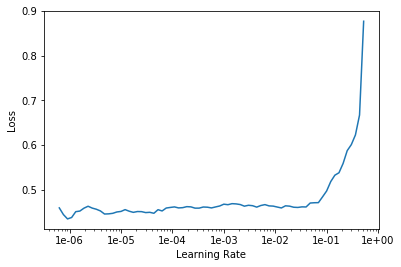

In [0]:
# show the best lr
learn.recorder.plot()

In [0]:
# train model again using best lr range
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.428775,0.441751,0.182116,05:08
1,0.376029,0.472830,0.209270,05:12
2,0.344487,0.336980,0.158708,05:13
3,0.288787,0.326980,0.156835,05:11
4,0.247398,0.316689,0.147004,05:12
